In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [6]:
df_youtube = pd.read_csv("data/INvideos.csv")

In [8]:
print(df_youtube.shape)
print(df_youtube.nunique())

(37352, 16)
video_id                  16307
trending_date               205
title                     16721
channel_title              1426
category_id                  17
publish_time              16339
tags                      12578
views                     32136
likes                     15529
dislikes                   5079
comment_count              6027
thumbnail_link            16523
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               13992
dtype: int64


In [11]:
df_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
video_id                  37352 non-null object
trending_date             37352 non-null object
title                     37352 non-null object
channel_title             37352 non-null object
category_id               37352 non-null int64
publish_time              37352 non-null object
tags                      37352 non-null object
views                     37352 non-null int64
likes                     37352 non-null int64
dislikes                  37352 non-null int64
comment_count             37352 non-null int64
thumbnail_link            37352 non-null object
comments_disabled         37352 non-null bool
ratings_disabled          37352 non-null bool
video_error_or_removed    37352 non-null bool
description               36791 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 3.8+ MB


In [14]:
df_youtube.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."


C:\Users\manish-laptop\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


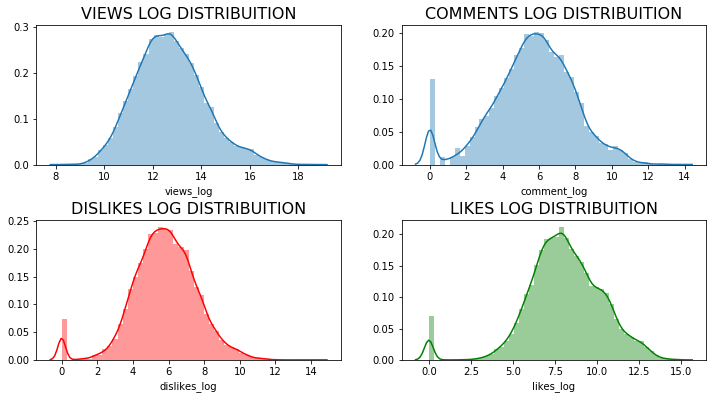

In [16]:
df_youtube['likes_log'] = np.log(df_youtube['likes'] + 1)
df_youtube['views_log'] = np.log(df_youtube['views'] + 1)
df_youtube['dislikes_log'] = np.log(df_youtube['dislikes'] + 1)
df_youtube['comment_log'] = np.log(df_youtube['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df_youtube['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_youtube['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_youtube['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_youtube['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [18]:
print("Views quantiles")
print(df_youtube['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(df_youtube['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(df_youtube['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(df_youtube['comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01       18801.51
0.25      123915.50
0.50      304586.00
0.75      799291.25
0.99    13305944.98
Name: views, dtype: float64

Likes quantiles
0.01         0.00
0.25       864.00
0.50      3069.00
0.75     13774.25
0.99    432675.00
Name: likes, dtype: float64

Dislikes quantiles
0.01        0.00
0.25      108.00
0.50      326.00
0.75     1019.25
0.99    21373.36
Name: dislikes, dtype: float64

Comment quantiles
0.01        0.00
0.25       81.00
0.50      329.00
0.75     1285.00
0.99    42380.28
Name: comment_count, dtype: float64


In [19]:
df_youtube['category_name'] = np.nan

df_youtube.loc[(df_youtube["category_id"] == 1),"category_name"] = 'Film and Animation'
df_youtube.loc[(df_youtube["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df_youtube.loc[(df_youtube["category_id"] == 10),"category_name"] = 'Music'
df_youtube.loc[(df_youtube["category_id"] == 15),"category_name"] = 'Pets and Animals'
df_youtube.loc[(df_youtube["category_id"] == 17),"category_name"] = 'Sport'
df_youtube.loc[(df_youtube["category_id"] == 19),"category_name"] = 'Travel and Events'
df_youtube.loc[(df_youtube["category_id"] == 20),"category_name"] = 'Gaming'
df_youtube.loc[(df_youtube["category_id"] == 22),"category_name"] = 'People and Blogs'
df_youtube.loc[(df_youtube["category_id"] == 23),"category_name"] = 'Comedy'
df_youtube.loc[(df_youtube["category_id"] == 24),"category_name"] = 'Entertainment'
df_youtube.loc[(df_youtube["category_id"] == 25),"category_name"] = 'News and Politics'
df_youtube.loc[(df_youtube["category_id"] == 26),"category_name"] = 'How to and Style'
df_youtube.loc[(df_youtube["category_id"] == 27),"category_name"] = 'Education'
df_youtube.loc[(df_youtube["category_id"] == 28),"category_name"] = 'Science and Technology'
df_youtube.loc[(df_youtube["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df_youtube.loc[(df_youtube["category_id"] == 25),"category_name"] = 'News & Politics'

In [20]:
df_youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,likes_log,views_log,dislikes_log,comment_log,category_name
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,...,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,10.433145,13.907477,6.683361,6.783325,Film and Animation
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,...,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",6.601230,13.288051,6.807935,0.000000,News & Politics
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,...,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,7.606885,13.068939,5.497168,5.010635,Entertainment
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,...,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,11.161295,14.032782,7.393263,7.895436,Comedy
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,...,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,6.200509,13.047674,5.683580,4.204693,Entertainment


In [21]:
print("Category Name count")
print(df_youtube.category_name.value_counts()[:5])

Category Name count
Entertainment       16712
News & Politics      5241
Music                3858
Comedy               3429
People and Blogs     2624
Name: category_name, dtype: int64


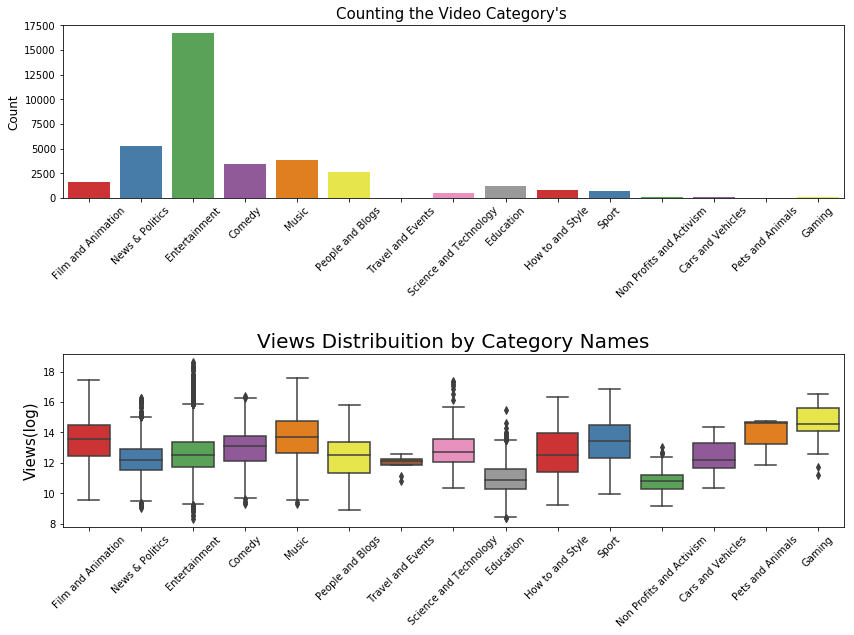

In [24]:
plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=df_youtube, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=df_youtube, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

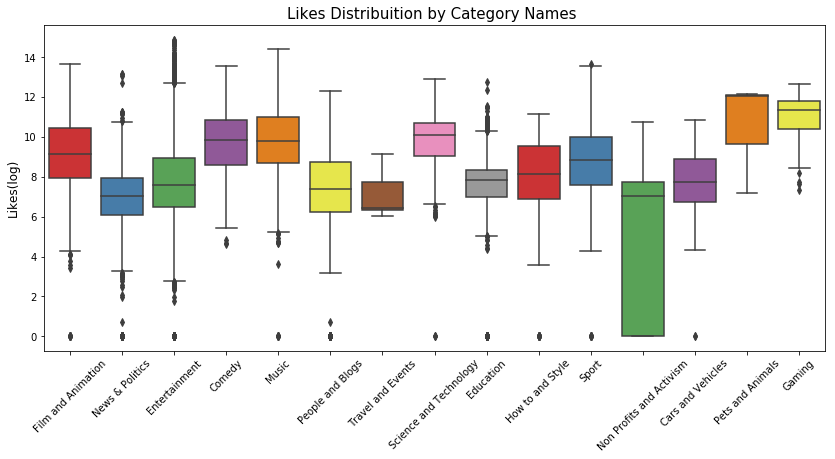

In [25]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=df_youtube, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

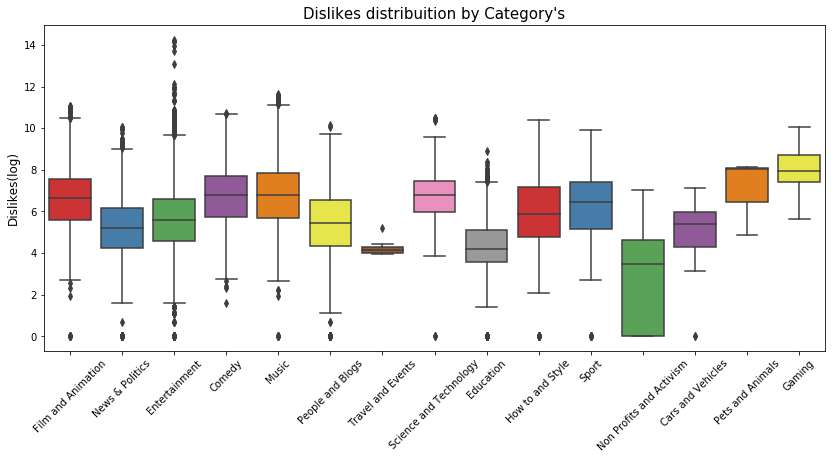

In [26]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=df_youtube, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

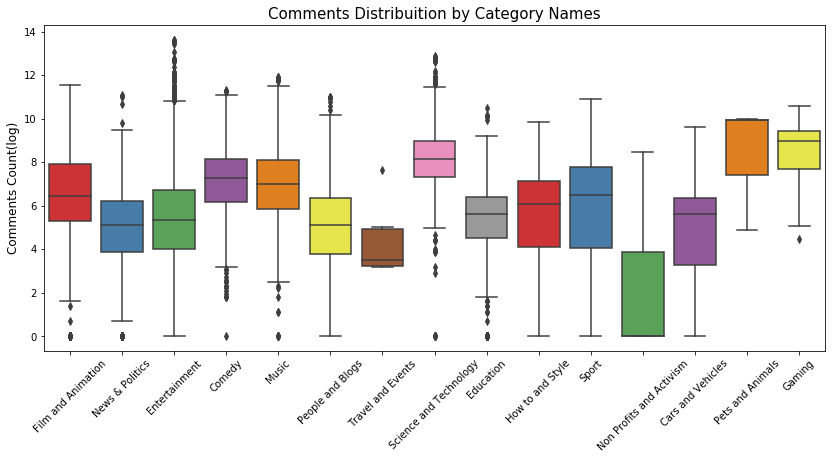

In [27]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=df_youtube, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

In [28]:
df_youtube['like_rate'] =  df_youtube['likes'] / df_youtube['views'] * 100
df_youtube['dislike_rate'] =  df_youtube['dislikes'] / df_youtube['views'] * 100
df_youtube['comment_rate'] =  df_youtube['comment_count'] / df_youtube['views'] * 100

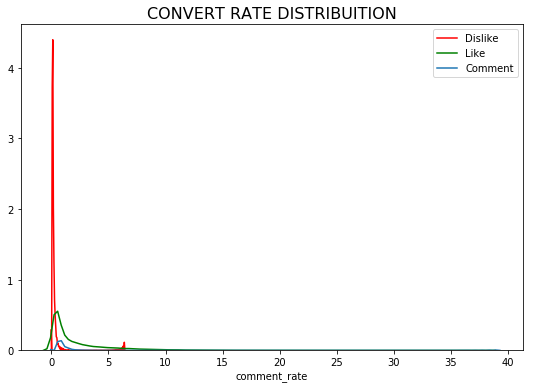

In [29]:
plt.figure(figsize = (9,6))

g1 = sns.distplot(df_youtube['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(df_youtube['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(df_youtube['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

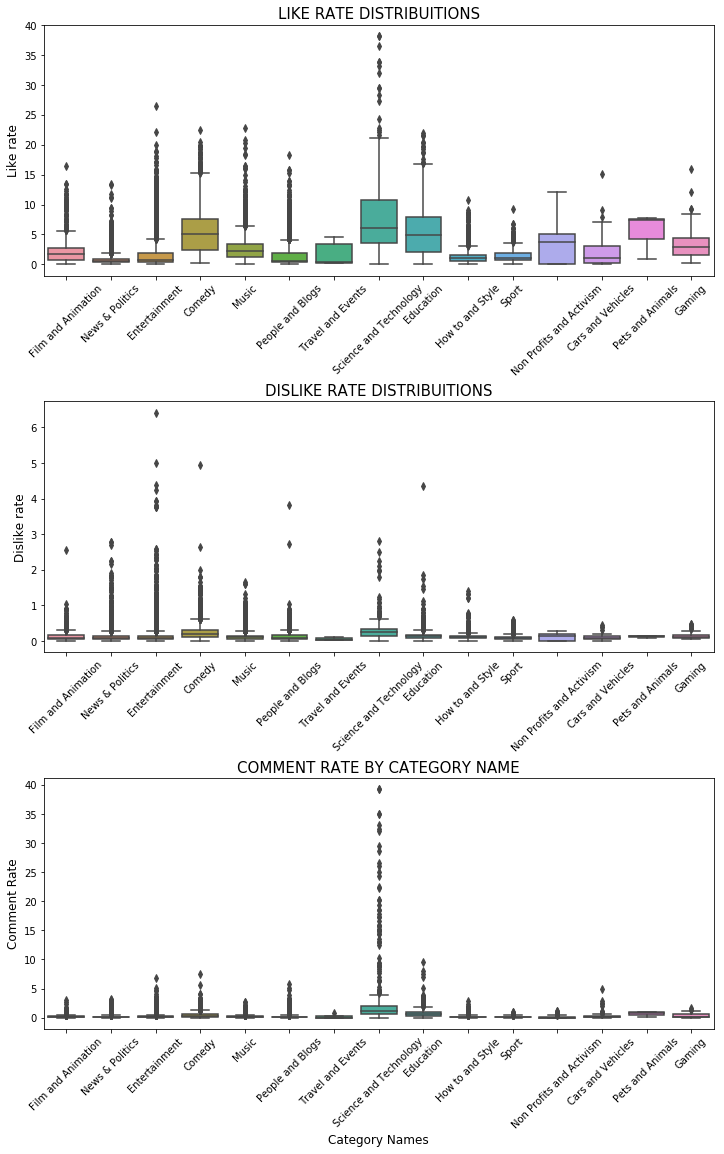

In [30]:
plt.figure(figsize = (12,18))

plt.subplot(311)
g= sns.boxplot(x='category_name',y='like_rate',  data=df_youtube)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("LIKE RATE DISTRIBUITIONS", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)

plt.subplot(312)
g1= sns.boxplot(y='dislike_rate', x='category_name', data=df_youtube)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("DISLIKE RATE DISTRIBUITIONS", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Dislike rate", fontsize=12)

plt.subplot(313)
g2= sns.boxplot(y='comment_rate', x='category_name', data=df_youtube)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("COMMENT RATE BY CATEGORY NAME", fontsize=15)
g2.set_xlabel("Category Names", fontsize=12)
g2.set_ylabel("Comment Rate", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.9)

plt.show()

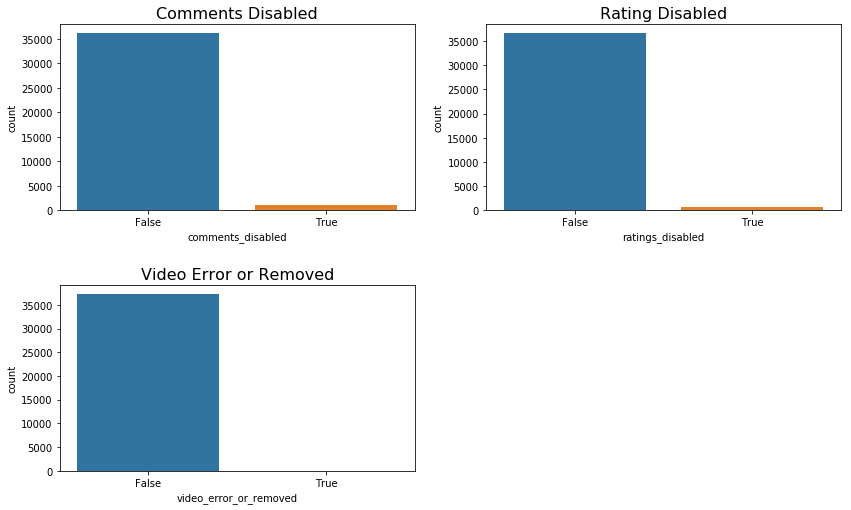

In [31]:
plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.subplot(2,2,1)
g = sns.countplot(x='comments_disabled', data=df_youtube)
g.set_title("Comments Disabled", fontsize=16)

plt.subplot(2,2,2)
g1 = sns.countplot(x='ratings_disabled', data=df_youtube)
g1.set_title("Rating Disabled", fontsize=16)

plt.subplot(2,2,3)
g2 = sns.countplot(x='video_error_or_removed', data=df_youtube)
g2.set_title("Video Error or Removed", fontsize=16)
plt.show()

C:\Users\manish-laptop\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\manish-laptop\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\manish-laptop\AppData\Roaming\Python\Python36\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


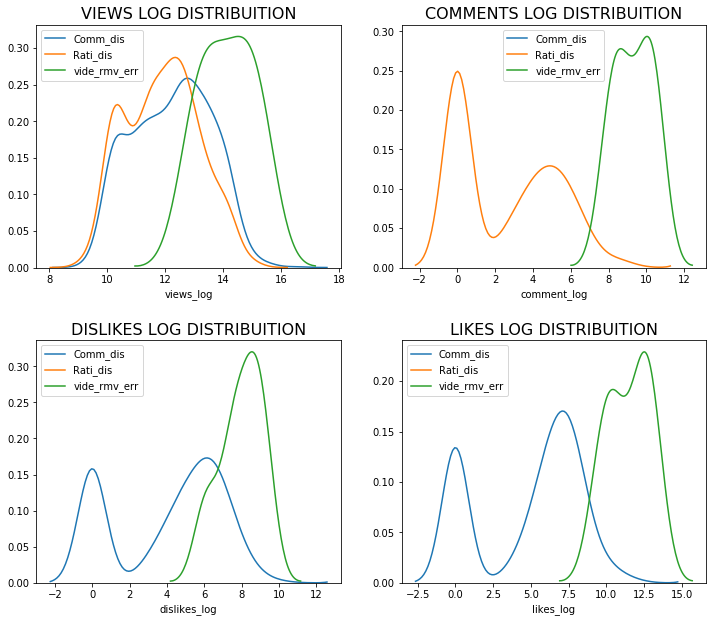

In [32]:
plt.figure(figsize = (12,10))

plt.subplot(221)
g1 = sns.distplot(df_youtube[df_youtube['comments_disabled'] == True]['views_log'], 
                  hist=False, label='Comm_dis')
g1 = sns.distplot(df_youtube[df_youtube['ratings_disabled'] == True]['views_log'], 
                  hist=False, label='Rati_dis')
g1 = sns.distplot(df_youtube[df_youtube['video_error_or_removed'] == True]['views_log'], 
                  hist=False, label='vide_rmv_err')
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_youtube[df_youtube['comments_disabled'] == True]['comment_log'],
                  hist=False, label='Comm_dis')
g4 = sns.distplot(df_youtube[df_youtube['ratings_disabled'] == True]['comment_log'], 
                  hist=False, label='Rati_dis')
g4 = sns.distplot(df_youtube[df_youtube['video_error_or_removed'] == True]['comment_log'], 
                  hist=False, label='vide_rmv_err')
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_youtube[df_youtube['comments_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Comm_dis')
g3 = sns.distplot(df_youtube[df_youtube['ratings_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Rati_dis')
g3 = sns.distplot(df_youtube[df_youtube['video_error_or_removed'] == True]['dislikes_log'], 
                  hist=False, label='vide_rmv_err')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_youtube[df_youtube['comments_disabled'] == True]['likes_log'], 
                  hist=False, label='Comm_dis')
g2 = sns.distplot(df_youtube[df_youtube['ratings_disabled'] == True]['likes_log'], 
                  hist=False, label='Rati_dis')
g2 = sns.distplot(df_youtube[df_youtube['video_error_or_removed'] == True]['likes_log'], 
                  hist=False, label='vide_rmv_err')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3,top = 0.9)
plt.legend()
plt.show()

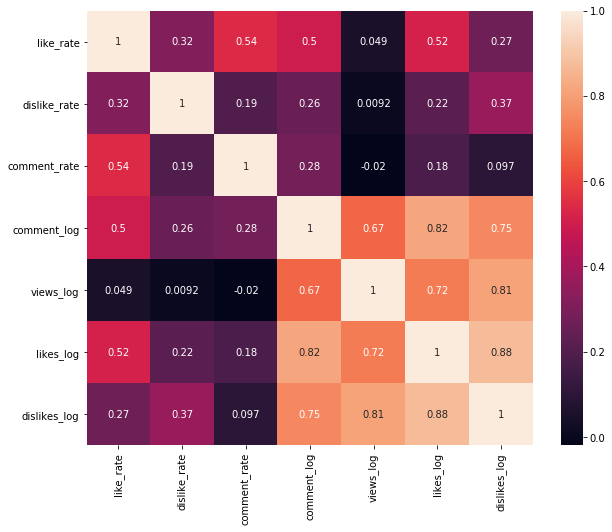

In [33]:
plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(df_youtube[['like_rate', 'dislike_rate', 'comment_rate', 'comment_log',
         'views_log','likes_log','dislikes_log', "category_name"]].corr(), annot=True)
plt.show()

In [35]:
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
# import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer 

In [36]:
eng_stopwords = set(stopwords.words("english"))

In [37]:
#Word count in each comment:
df_youtube['count_word']=df_youtube["title"].apply(lambda x: len(str(x).split()))
df_youtube['count_word_tags']=df_youtubebeubeubeubeube["tags"].apply(lambda x: len(str(x).split()))

In [38]:
#Unique word count
df_youtube['count_unique_word']=df_youtube["title"].apply(lambda x: len(set(str(x).split())))
df_youtube['count_unique_word_tags']=df_youtube["tags"].apply(lambda x: len(set(str(x).split())))


In [39]:
#Letter count
df_youtube['count_letters']=df_youtube["title"].apply(lambda x: len(str(x)))
df_youtube['count_letters_tags']=df_youtube["tags"].apply(lambda x: len(str(x)))

In [40]:
#punctuation count
df_youtube["count_punctuations"] =df_youtube["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_youtube["count_punctuations_tags"] =df_youtube["tags"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_youtube["count_words_upper"] = df_youtube["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df_youtube["count_words_upper_tags"] = df_youtube["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_youtube["count_words_title"] = df_youtube["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df_youtube["count_words_title_tags"] = df_youtube["tags"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_youtube["count_stopwords"] = df_youtube["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df_youtube["count_stopwords_tags"] = df_youtube["tags"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df_youtube["mean_word_len"] = df_youtube["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_youtube["mean_word_len_tags"] = df_youtube["tags"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [41]:
#derived features
#Word count percent in each comment:
df_youtube['word_unique_percent']=df_youtube['count_unique_word']*100/df_youtube['count_word']
df_youtube['word_unique_percent_tags']=df_youtube['count_unique_word_tags']*100/df_youtube['count_word_tags']

#Punct percent in each comment:
df_youtube['punct_percent']=df_youtube['count_punctuations']*100/df_youtube['count_word']
df_youtube['punct_percent_tags']=df_youtube['count_punctuations_tags']*100/df_youtube['count_word_tags']

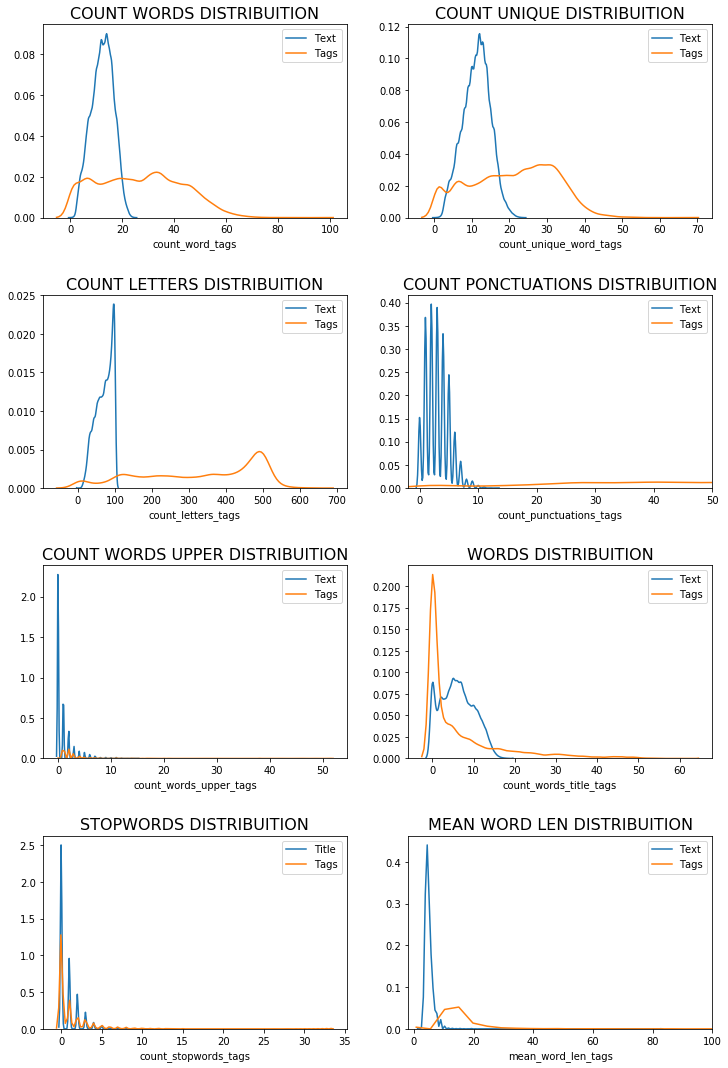

In [42]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(df_youtube['count_word'], 
                  hist=False, label='Text')
g1 = sns.distplot(df_youtube['count_word_tags'], 
                  hist=False, label='Tags')
g1.set_title("COUNT WORDS DISTRIBUITION", fontsize=16)

plt.subplot(422)
g2 = sns.distplot(df_youtube['count_unique_word'],
                  hist=False, label='Text')
g2 = sns.distplot(df_youtube['count_unique_word_tags'], 
                  hist=False, label='Tags')
g2.set_title("COUNT UNIQUE DISTRIBUITION", fontsize=16)

plt.subplot(423)
g3 = sns.distplot(df_youtube['count_letters'], 
                  hist=False, label='Text')
g3 = sns.distplot(df_youtube['count_letters_tags'], 
                  hist=False, label='Tags')
g3.set_title("COUNT LETTERS DISTRIBUITION", fontsize=16)

plt.subplot(424)
g4 = sns.distplot(df_youtube["count_punctuations"], 
                  hist=False, label='Text')
g4 = sns.distplot(df_youtube["count_punctuations_tags"], 
                  hist=False, label='Tags')
g4.set_xlim([-2,50])
g4.set_title('COUNT PONCTUATIONS DISTRIBUITION', fontsize=16)

plt.subplot(425)
g5 = sns.distplot(df_youtube["count_words_upper"] , 
                  hist=False, label='Text')
g5 = sns.distplot(df_youtube["count_words_upper_tags"] , 
                  hist=False, label='Tags')
g5.set_title('COUNT WORDS UPPER DISTRIBUITION', fontsize=16)

plt.subplot(426)
g6 = sns.distplot(df_youtube["count_words_title"], 
                  hist=False, label='Text')
g6 = sns.distplot(df_youtube["count_words_title_tags"], 
                  hist=False, label='Tags')
g6.set_title('WORDS DISTRIBUITION', fontsize=16)

plt.subplot(427)
g7 = sns.distplot(df_youtube["count_stopwords"], 
                  hist=False, label='Title')
g7 = sns.distplot(df_youtube["count_stopwords_tags"], 
                  hist=False, label='Tags')
g7.set_title('STOPWORDS DISTRIBUITION', fontsize=16)

plt.subplot(428)
g8 = sns.distplot(df_youtube["mean_word_len"], 
                  hist=False, label='Text')
g8 = sns.distplot(df_youtube["mean_word_len_tags"], 
                  hist=False, label='Tags')
g8.set_xlim([-2,100])
g8.set_title('MEAN WORD LEN DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()

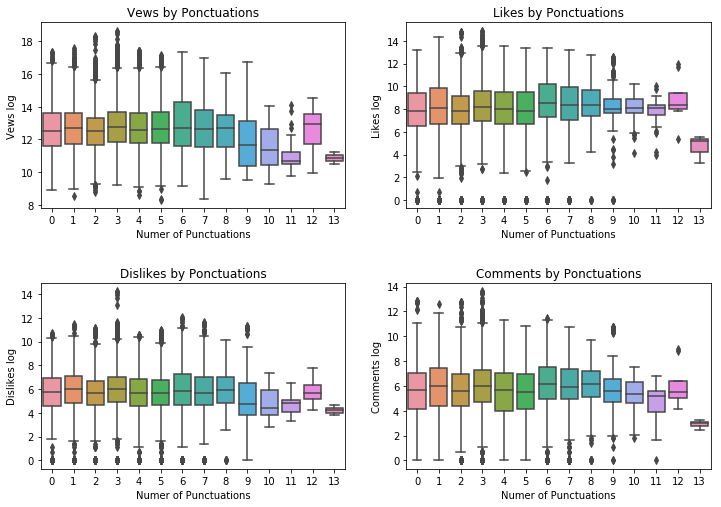

In [43]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations', y='views_log',data=df_youtube)
g.set_title("Vews by Ponctuations")
g.set_xlabel("Numer of Punctuations")
g.set_ylabel("Vews log")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations', y='likes_log',data=df_youtube)
g1.set_title("Likes by Ponctuations")
g1.set_xlabel("Numer of Punctuations")
g1.set_ylabel("Likes log")

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations', y='dislikes_log',data=df_youtube)
g2.set_title("Dislikes by Ponctuations")
g2.set_xlabel("Numer of Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations', y='comment_log',data=df_youtube)
g3.set_title("Comments by Ponctuations")
g3.set_xlabel("Numer of Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

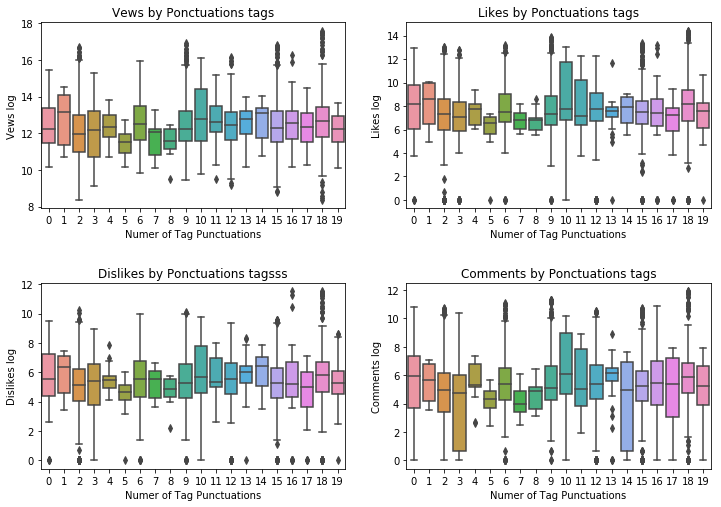

In [44]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations_tags', y='views_log',data=df_youtube[df_youtube['count_punctuations_tags'] < 20])
g.set_title("Vews by Ponctuations tags")
g.set_xlabel("Numer of Tag Punctuations")
g.set_ylabel("Vews log")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations_tags', y='likes_log',data=df_youtube[df_youtube['count_punctuations_tags'] < 20])
g1.set_title("Likes by Ponctuations tags")
g1.set_xlabel("Numer of Tag Punctuations")
g1.set_ylabel("Likes log")

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations_tags', y='dislikes_log',data=df_youtube[df_youtube['count_punctuations_tags'] < 20])
g2.set_title("Dislikes by Ponctuations tagsss")
g2.set_xlabel("Numer of Tag Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations_tags', y='comment_log',data=df_youtube[df_youtube['count_punctuations_tags'] < 20])
g3.set_title("Comments by Ponctuations tags")
g3.set_xlabel("Numer of Tag Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

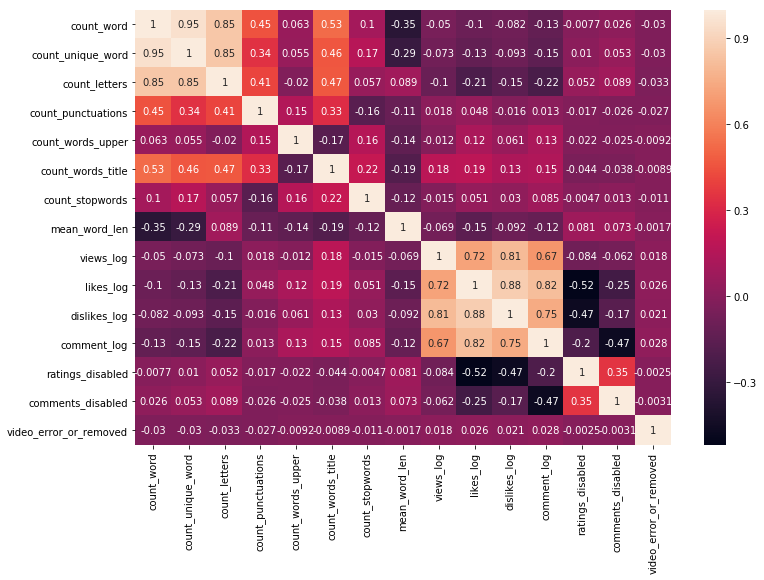

In [45]:
plt.figure(figsize = (12,8))

sns.heatmap(df_youtube[['count_word', 'count_unique_word','count_letters',
                     "count_punctuations","count_words_upper", "count_words_title", 
                     "count_stopwords","mean_word_len", 
                     'views_log', 'likes_log','dislikes_log','comment_log',
                     'ratings_disabled', 'comments_disabled', 'video_error_or_removed']].corr(), annot=True)
plt.show()

Visualizing the Word Cloud of Tagged videos
Ratings Disable
Comments Disable
Video Error or Removed

In [46]:
plt.rcParams['font.size']= 15              
plt.rcParams['savefig.dpi']= 100         
plt.rcParams['figure.subplot.bottom']= .1 

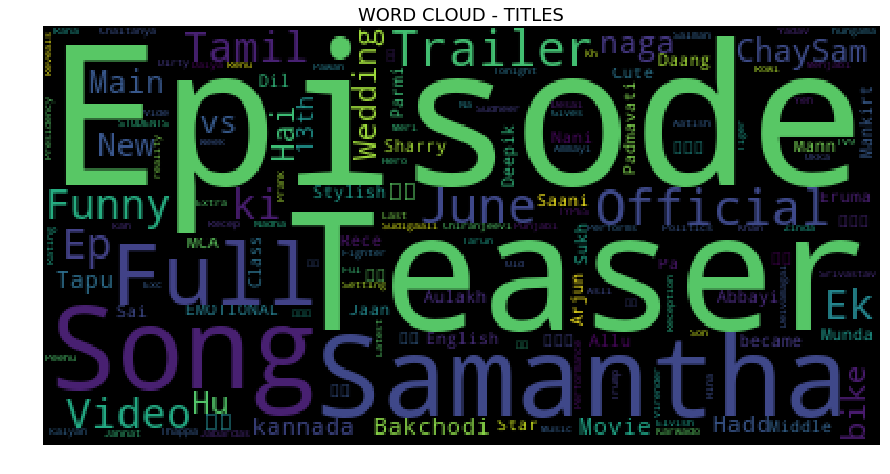

In [47]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_youtube['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

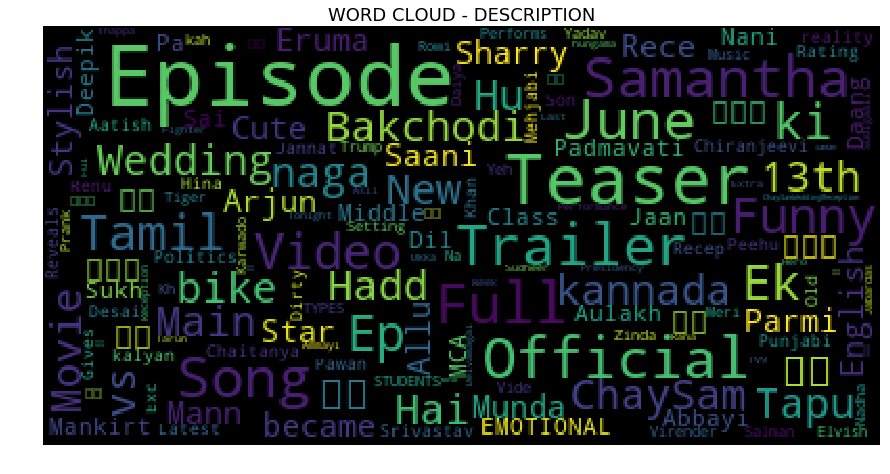

In [48]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_youtube['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

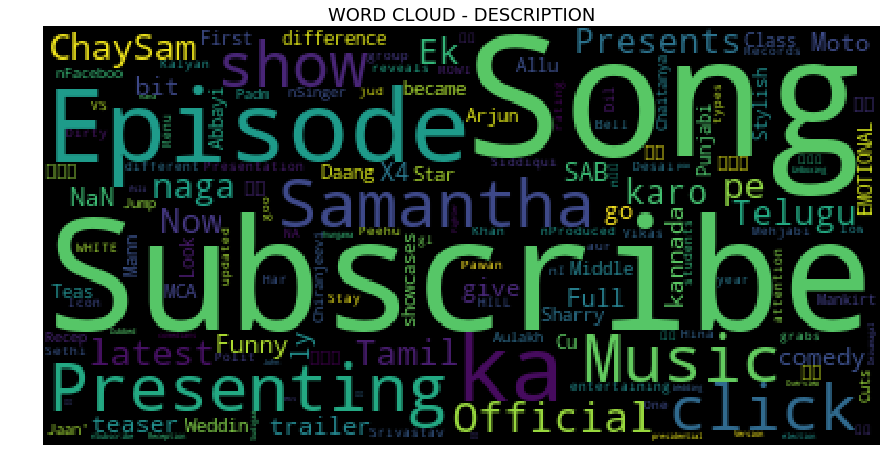

In [49]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']

stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=80, 
                          random_state=42
                         ).generate(str(df_youtube['description']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

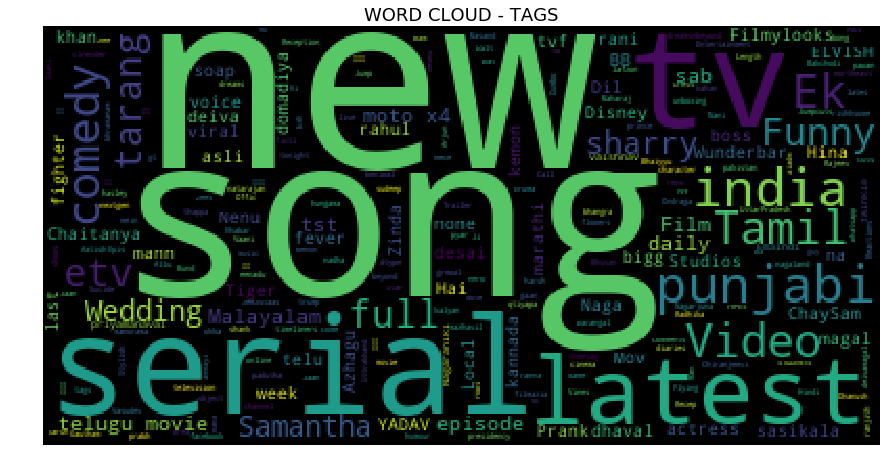

In [50]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_youtube['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

In [52]:
df_youtube['publish_time'] = pd.to_datetime(df_youtube['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

Category Name count
12    5754
5     5666
3     5436
1     5389
2     4766
Name: month, dtype: int64


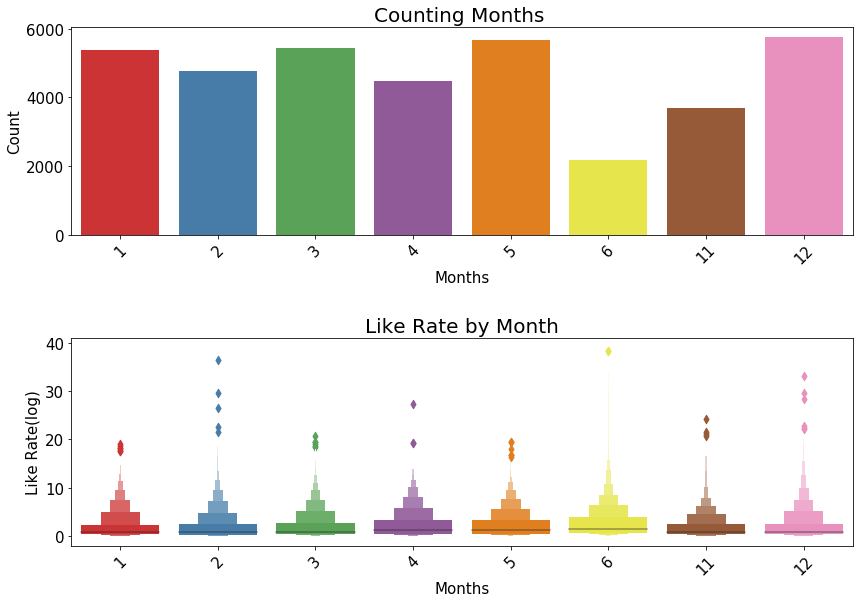

In [54]:
df_youtube['month'] = df_youtube['publish_time'].dt.month

print("Category Name count")
print(df_youtube['month'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('month', data=df_youtube, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='month', y='like_rate', data=df_youtube, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Month", fontsize=20)
g1.set_xlabel("Months", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

In [55]:
df_youtube.insert(4, 'publish_date', df_youtube['publish_time'].dt.date)
df_youtube['publish_time'] = df_youtube['publish_time'].dt.time
df_youtube[['hour','min','sec']] = df_youtube['publish_time'].astype(str).str.split(':', expand=True).astype(int)

TOP 5 Hour values
14    2838
12    2782
13    2631
6     2323
11    2295
Name: hour, dtype: int64


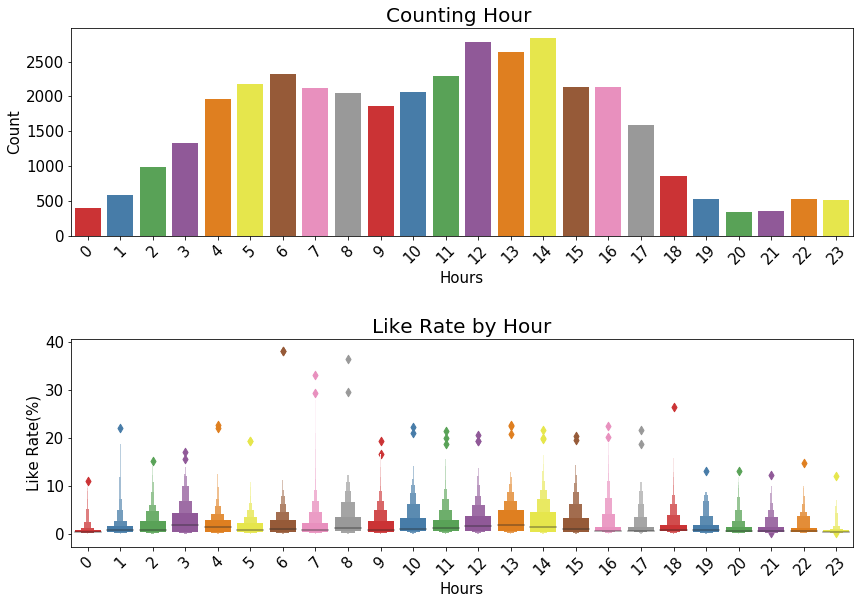

In [56]:
print("TOP 5 Hour values")
print(df_youtube['hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('hour', data=df_youtube, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='hour', y='like_rate', data=df_youtube, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Hour", fontsize=20)
g1.set_xlabel("Hours", fontsize=15)
g1.set_ylabel("Like Rate(%)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

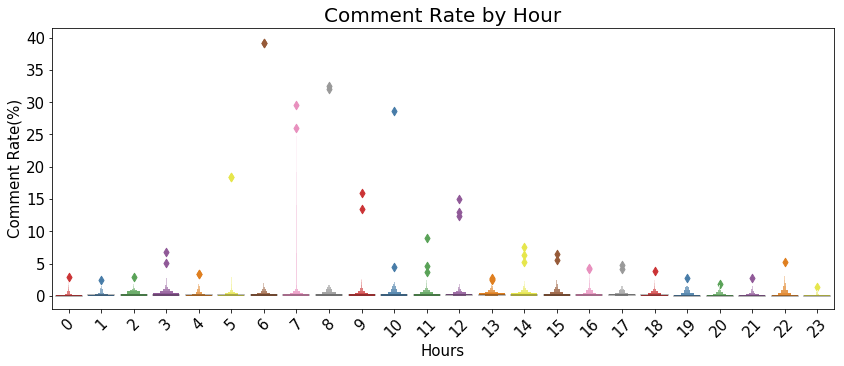

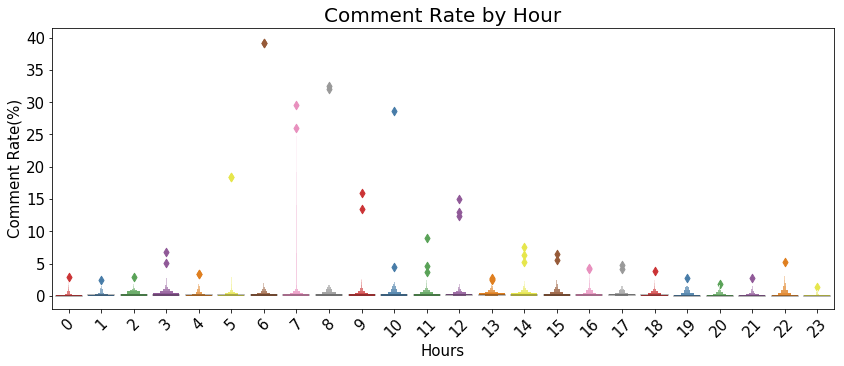

In [58]:
plt.figure(figsize=(14,5))

g1 = sns.lvplot(x='hour', y='comment_rate', data=df_youtube, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Comment Rate by Hour", fontsize=20)
g1.set_xlabel("Hours", fontsize=15)
g1.set_ylabel("Comment Rate(%)", fontsize=15)
plt.show()